# Apche Cassandra

# What is Apche Cassandra?

Apache Cassandra is a highly scalable, high-performance distributed database designed to handle large amounts of data across many commodity servers, providing high availability with no single point of failure. It is a type of NoSQL database. Cassandra offers robust support for clusters spanning multiple datacenters, with asynchronous masterless replication allowing low latency operations for all clients.

# Why Cassandra is a NoSQL database?

Cassandra is classified as a NoSQL database because it does not rely on the traditional table-based relational database structure. Instead, it offers a flexible and schema-free data model that can store and process large amounts of data across many servers. 

Cassandra's NoSQL characteristics include:

1. **Schema-less Data Model**: Cassandra does not enforce a fixed schema. This allows for flexibility in storing and manipulating your data.

2. **Horizontal Scalability**: Cassandra can scale out horizontally, meaning you can increase capacity by adding more nodes to the system.

3. **Distributed Architecture**: Data is automatically partitioned and replicated across multiple nodes in the cluster.

4. **High Availability and Fault Tolerance**: Cassandra has no single point of failure and it is designed to be always available.

5. **Support for Unstructured Data**: Cassandra can handle all types of data including structured, semi-structured, and unstructured, providing flexibility for data management.

These features make Cassandra a good fit for handling large amounts of data across many commodity servers, thus it falls under the NoSQL category.

# What are some key features of Apache Cassandra?

Apache Cassandra has several key features that make it a popular choice for high-scale applications:

1. **Distributed**: Every node in the cluster has the same role. There is no single point of failure and the system is resilient to failures.

2. **Scalability**: Cassandra is designed to handle big data. Its distributed architecture allows for easy horizontal scaling, meaning that you can add more machines to increase capacity and throughput.

3. **High Availability and Fault Tolerance**: Cassandra provides robust support for ensuring your data is always available. Data is automatically replicated to multiple nodes for fault-tolerance.

4. **Tunable Consistency**: Cassandra offers a range of consistency options, from "eventual consistency" to "strong consistency", providing a flexible approach to consistency.

5. **Flexible Schema**: Cassandra's column-family data model offers the convenience of column indexes with the performance of log-structured updates, strong support for denormalization and materialized views, and powerful built-in caching.

6. **Multi-Datacenter Replication**: Cassandra is designed as a distributed system, for deployment of large numbers of nodes across multiple data centers. Key features of Cassandra’s distributed architecture are specifically tailored for multiple-datacenter deployment, for redundancy, for failover and disaster recovery.

7. **CQL (Cassandra Query Language)**: An SQL-like language that makes moving from a relational database to Cassandra easier for developers.

8. **Transaction Support**: Cassandra supports properties like Atomicity, Consistency, Isolation, and Durability (ACID).

9. **Security**: Features like authentication, authorization, and auditing are built-in to Cassandra.

10. **Integration**: Cassandra can be easily integrated with Hadoop, Spark, and other big data processing tools.

# History of Cassandra

Apache Cassandra was developed at Facebook to power their Inbox Search feature. It was designed to handle a large amount of data spread out across many commodity servers while providing a highly available service with no single point of failure. 

The project started in 2008 and was open-sourced by Facebook in July of the same year. It was heavily influenced by two Amazon technologies: Dynamo, a highly available key-value store, and Google's BigTable, a distributed storage system for managing structured data. 

Cassandra took the decentralized, distributed, and fault-tolerant nature from Dynamo and combined it with the column family data model of Google's BigTable. 

In 2010, after several versions, Cassandra became a top-level Apache project. Since then, it has been adopted by many organizations that require a solution for managing large amounts of data, including companies like Netflix, Twitter, and eBay.

Cassandra continues to be maintained and developed by the Apache Software Foundation.

# Cassandra Architecture

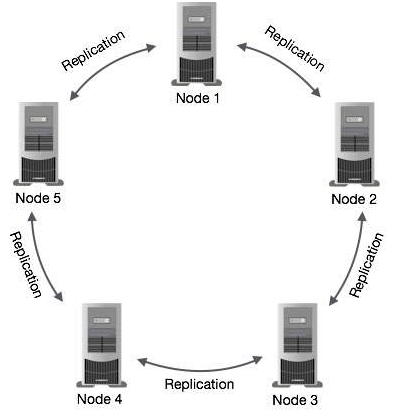

In [5]:
from IPython.display import Image
Image("Images/cassandra-architecture1.png",width=700, height=500)

Apache Cassandra's architecture is designed as a distributed system, for deployment of large numbers of nodes across multiple data centers. Here are the key components of its architecture:

1. **Node**: This is the basic infrastructure component of Cassandra. Each node stores data.

2. **Data Center**: A collection of related nodes. A data center can be a physical data center or virtual data center. Different types of data centers (physical/virtual) can be used in Cassandra.

3. **Cluster**: A cluster is a component that contains one or more data centers.

4. **Commit Log**: Every write operation is written to the Commit Log. This is a crash-recovery mechanism in Cassandra.

5. **Mem-table**: After data is written, it is stored in the mem-table. It is a memory-resident data structure. After reaching a threshold, data in mem-table is flushed to SSTables on disk.

6. **SSTable (Sorted String Table)**: It is a disk file to which the data is flushed from the mem-table when its contents reach a threshold value.

7. **Bloom Filter**: These are nothing but quick, nondeterministic, algorithms for testing whether an element is a member of a set. It is a special kind of cache. Bloom filters are used to save IO when performing a key lookup: each SSTable has a bloom filter associated with it that checks if any data for the requested key is in that SSTable.

8. **Partitioner**: The partitioner determines how to distribute the data across the nodes in the cluster (it determines the distribution of data across the nodes).

9. **Replica**: It is the duplication of data in the nodes of a cluster. Replication factor is the number of machine copies of the same data.

10. **Gossip Protocol**: It is a peer-to-peer communication protocol in which nodes periodically exchange state information about themselves and about other nodes they know about.

11. **Consistency Level**: It is the number of nodes that must acknowledge a read or write operation before it is considered successful.

Cassandra's architecture provides a highly available, fault-tolerant system that can handle large amounts of data across many commodity servers.

# Cassandra Query Language

Cassandra Query Language (CQL) is a language for communicating with the Cassandra database. It is similar to SQL in syntax, making it easier for developers who are familiar with SQL to use Cassandra. Here are some key points about CQL:

1. **Schema Definition**: Like SQL, CQL allows you to define the schema for your data. You can create, alter, and drop keyspaces (similar to databases in SQL), tables, and indexes.

2. **Data Manipulation**: CQL provides commands for inserting, updating, deleting, and querying data in your tables.

3. **Batch Operations**: You can group multiple operations together in a batch to ensure atomicity.

4. **Tunable Consistency**: You can specify the consistency level for your queries to balance between performance and accuracy.

5. **Collections**: CQL supports lists, sets, and maps as collection data types.

Here's an example of what CQL looks like:



In [ ]:
CREATE KEYSPACE my_keyspace 
WITH REPLICATION = { 'class' : 'SimpleStrategy', 'replication_factor' : 3 };

USE my_keyspace;

CREATE TABLE users (
  user_id int PRIMARY KEY,
  first_name text,
  last_name text,
  email text
);

INSERT INTO users (user_id, first_name, last_name, email) 
VALUES (1, 'John', 'Doe', 'john.doe@example.com');

SELECT * FROM users WHERE user_id = 1;



In this example, we create a keyspace, switch to using it, create a table within it, insert a row of data, and then query for that data.

# Write Operations

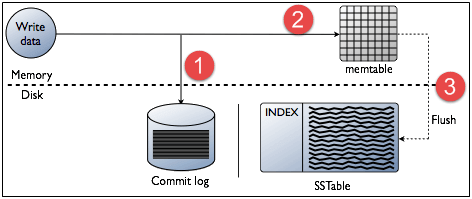

In [6]:
Image("Images/cassandra-architecture2.png",width=700, height=500)

In Apache Cassandra, write operations follow a particular flow:

1. **Client Write Request**: The write operation begins when a client sends a write request to a node (this node is known as the coordinator).

2. **Log the Write**: The coordinator logs the write to the commit log. The commit log is a crash-recovery mechanism in Cassandra. It ensures data durability by logging every write operation to disk.

3. **Write to Memtable**: The write is also written to the memtable. A memtable is an in-memory data structure. After reaching a threshold, data in the memtable is flushed to SSTables on disk.

4. **Replication**: The coordinator then replicates the write to other nodes in the cluster based on the replication factor and strategy defined for the keyspace. The replication factor is the number of replicas in the cluster.

5. **Acknowledgement**: After the replicas have been written, the coordinator sends an acknowledgement to the client.

It's important to note that Cassandra's write operations are designed to be fast. By writing to the commit log and memtable, Cassandra can complete the write quickly without waiting for the data to be written to disk. The data is then flushed to disk from the memtable asynchronously.

Here's a simple CQL example of a write operation:



In [ ]:
INSERT INTO users (user_id, first_name, last_name, email) 
VALUES (1, 'John', 'Doe', 'john.doe@example.com');



In this example, the `INSERT` statement is the write operation. The data is written to the `users` table.

# Read Operations

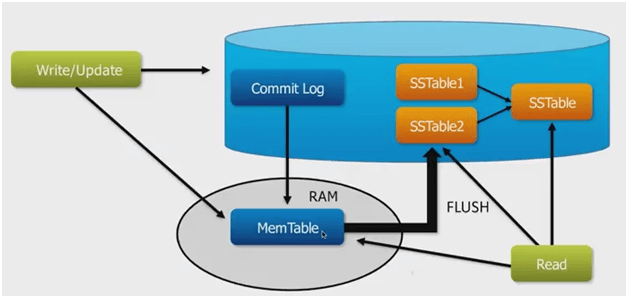

In [7]:
Image("Images/cassandra-architecture3.png",width=700, height=500)

In Apache Cassandra, read operations follow a particular flow:

1. **Client Read Request**: The read operation begins when a client sends a read request to a node (this node is known as the coordinator).

2. **Check in Memtable and SSTables**: The coordinator checks the memtable and then checks SSTables for the requested data. The memtable is an in-memory data structure where writes are stored before they are flushed to SSTables on disk.

3. **Bloom Filter Check**: Before checking the SSTables, a Bloom filter is used to check if the row data exists in the SSTable. A Bloom filter is a data structure that can be used to test whether an element is a member of a set.

4. **Partition Summary and Key Cache**: If the Bloom filter indicates that the row may exist in the SSTable, the coordinator checks the partition key cache, which can quickly point to the location of the data in the SSTable. If the partition key is not in the cache, the partition summary is checked.

5. **Fetch Data from Disk**: If the data is not in the memtable or key cache, the coordinator fetches the data from the SSTable on disk.

6. **Consistency Level**: The coordinator waits for responses from the replicas based on the consistency level specified for the read operation. Once the required number of responses is received, the coordinator returns the data to the client.

Here's a simple CQL example of a read operation:



In [ ]:
SELECT * FROM users WHERE user_id = 1;



In this example, the `SELECT` statement is the read operation. The data is read from the `users` table where the `user_id` is 1.

# Differeneces between NoSQL and Relational database

Here's a comparison of NoSQL and Relational databases in tabular form:

| Feature | NoSQL | Relational Database |
| --- | --- | --- |
| **Data Structure** | Can store data in several ways: key-value pairs, wide-column stores, document-based, or graph databases. | Store data in tables with rows and columns, similar to a spreadsheet. |
| **Schema** | Typically schema-less, can insert data without defining the structure first. | Require a predefined schema defined by tables, columns, and relations. |
| **Scalability** | Designed to expand horizontally by adding more servers to the network (horizontal scaling). | Typically scaled by enhancing the hardware of the server (vertical scaling). |
| **Transactions** | Prioritize speed and scalability, often offering eventual consistency and not always supporting ACID transactions. | Use ACID transactions (Atomicity, Consistency, Isolation, Durability), ensuring data integrity. |
| **Query Language** | Use a variety of query languages. | Use SQL (Structured Query Language) for defining and manipulating the data. |
| **Normalization** | Often allow and even encourage data redundancy to improve read performance. | Often use normalization to reduce data redundancy. |
| **Relationships** | Can handle relationships but are often better suited for less complex, hierarchical relationships. | Designed to handle complex relationships between data. |
| **Use Cases** | Great for large data sets, high-speed operations, flexible data structures, and scalability. | Excellent for complex queries, transactions, and operations requiring strong consistency. |

# Use Cases/ Applications of Cassandra

Apache Cassandra is a highly scalable, high-performance distributed database designed to handle large amounts of data across many commodity servers, providing high availability with no single point of failure. Here are some use cases where Cassandra is particularly well-suited:

1. **Time Series Data**: Cassandra's wide-column store makes it a great choice for time series data. This is data that is time-stamped and collected at regular intervals. Examples include IoT sensor data, stock market data, or server metrics.

2. **Messaging**: Cassandra's high write throughput makes it a good choice for messaging systems, where messages need to be written, read, and deleted at a high rate.

3. **Product Catalogs and Playlists**: Cassandra's ability to replicate data across multiple data centers makes it a good choice for applications that need to serve users globally, such as product catalogs or music playlists.

4. **Recommendation and Personalization Engines**: Cassandra's ability to handle large amounts of data and its flexible data model make it a good choice for recommendation and personalization engines, which need to process and serve personalized data for each user.

5. **Fraud Detection**: Cassandra's real-time processing capabilities make it suitable for applications like fraud detection, where you need to process and analyze large volumes of data in real time.

6. **User Activity Tracking**: Websites and mobile apps often track user activity for analytics or personalization. Cassandra's scalability and high write throughput make it a good choice for this use case.

7. **Social Media Analytics**: Cassandra can handle the large volumes of data generated by social media platforms and provide real-time analytics.

8. **Content Management and Distribution**: Cassandra's data replication capabilities make it a good choice for content management and distribution systems, where content needs to be distributed and served from multiple geographical locations.

Remember, the choice of database depends on the specific requirements of your application. Cassandra is a good choice when you need high write throughput, scalability, and high availability.

# Cassandra Data Types

Here's a table of some common Cassandra data types:

| CQL Type | Constants | Description | Example |
| --- | --- | --- | --- |
| **ascii** | ASCII | An ASCII character string | 'Hello' |
| **bigint** | Long | A 64-bit signed long | 123456789L |
| **blob** | Blob | Arbitrary bytes (no validation), expressed as hexadecimal | 0x48656c6c6f |
| **boolean** | Boolean | A boolean value, either true or false | true |
| **counter** | Counter | A distributed counter value (64-bit long) | N/A |
| **date** | Date | A date (without a time), encoded as a string in the form yyyy-mm-dd | '2022-01-01' |
| **decimal** | Decimal | A variable-precision decimal | 12.34567 |
| **double** | Double | A 64-bit IEEE-754 floating point | 12.34567d |
| **float** | Float | A 32-bit IEEE-754 floating point | 12.34f |
| **inet** | Inet | An IP address, either IPv4 or IPv6 | '192.0.2.0' |
| **int** | Int | A 32-bit signed integer | 123 |
| **text** | Text | A UTF-8 encoded string | 'Hello' |
| **timestamp** | Timestamp | A timestamp, encoded as a long timestamp since the epoch (midnight, January 1, 1970) | '2022-01-01 00:00:00' |
| **uuid** | UUID | A UUID, encoded as a 16-byte (128-bit) value | 550e8400-e29b-41d4-a716-446655440000 |
| **varint** | Varint | An arbitrary-precision integer | 123456789123456789 |
| **timeuuid** | TimeUUID | A UUID type 1, encoded as a 16-byte (128-bit) value, used to store a date-time in the first 8 bytes | N/A |
| **list** | List | A collection of one or more ordered elements | ['apple', 'banana', 'cherry'] |
| **map** | Map | A JSON-style array of literals: { literal : literal, literal : literal ... } | {'name': 'John', 'age': 30} |
| **set** | Set | A collection of one or more elements | {'apple', 'banana', 'cherry'} |

Please note that this is not an exhaustive list of Cassandra's data types. There are also user-defined types, tuples, and other complex types.

# Cassandra Automatic Data Expiration

Cassandra provides a feature called Time to Live (TTL) to support automatic expiration of data. TTL is the period of time in seconds after which Cassandra will automatically delete the data.

When you insert or update data in Cassandra, you can specify a TTL value. After the specified TTL period has passed, the data will be marked as expired and will be removed during the next compaction.

Here's an example of how to use TTL in a CQL INSERT statement:



In [ ]:
INSERT INTO table (column1, column2) VALUES ('value1', 'value2') USING TTL 3600;



In this example, the data ('value1', 'value2') will automatically be deleted after 3600 seconds (1 hour).

You can also update the TTL of existing data with an UPDATE statement:



In [ ]:
UPDATE table USING TTL 7200 SET column1 = 'new_value' WHERE column2 = 'value2';



In this example, the TTL of the data where column2 is 'value2' is updated to 7200 seconds (2 hours).

Please note that TTL is not meant to be used for precise deletion of data at a specific time, but rather as a way to manage the automatic cleanup of old data to save space. The actual deletion of the data happens during compaction, so there may be a delay between when the TTL expires and when the data is actually removed.

# Cassandra Data Model

The Cassandra data model is designed around the concept of a distributed hash table and is fundamentally different from a relational database model. Here are the key components:

1. **Cluster**: A cluster is the largest container in Cassandra, which can contain multiple nodes (servers). Each node holds a replica of the data.

2. **Keyspace**: A keyspace in Cassandra is similar to a database in relational databases. It is the outermost container for data in Cassandra. Replication is set at the keyspace level.

3. **Table (Column Family)**: Inside a keyspace, we have tables, also known as column families. A table contains a set of rows that are indexed by a primary key.

4. **Row**: A row is a collection of columns identified by a primary key.

5. **Column**: A column in Cassandra is a data structure which contains a column name, a value, and a timestamp.

6. **Primary Key**: The primary key in Cassandra is a column that is used to sort the data in Cassandra. The primary key consists of one or more columns of a table. The first part of the primary key is called the partition key, which determines the node in the cluster to hold the data. The remaining parts of the key are used for clustering columns to sort the data on the disk.

7. **Partition**: Data in Cassandra is distributed across the nodes of the cluster. The distribution is determined by the partition key. Each unique partition key corresponds to a partition, which is stored on a single node in the cluster.

8. **Replica**: A replica is a copy of a particular piece of data. Replication in Cassandra is designed to provide fault tolerance. Each piece of data is stored on multiple nodes to ensure reliability and fault tolerance.

Here's an example of how you might define a table in Cassandra:



In [ ]:
CREATE TABLE users (
    user_id int PRIMARY KEY,
    first_name text,
    last_name text,
    email text
);



In this example, `users` is the table, `user_id`, `first_name`, `last_name`, and `email` are the columns, and `user_id` is the primary key.

# Cassandra data Models Rules
* Cassandra doesn't support JOINS, GROUP BY, OR clause, aggregation etc. So you have to store data in a way that it should be retrieved whenever you want.
* Cassandra is optimized for high write performances so you should maximize your writes for better read performance and data availability. There is a tradeoff between data write and data read. So, optimize you data read performance by maximizing the number of data writes.
* Maximize data duplication because Cassandra is a distributed database and data duplication provides instant availability without a single point of failure.


# Data Modeling Goals
You should have following goals while modeling data in Cassandra:

**Spread Data Evenly Around the Cluster:** To spread equal amount of data on each node of Cassandra cluster, you have to choose integers as a primary key. Data is spread to different nodes based on partition keys that are the first part of the primary key.

**Minimize number of partitions read while querying data:** Partition is used to bind a group of records with the same partition key. When the read query is issued, it collects data from different nodes from different partitions.

In the case of many partitions, all these partitions need to be visited for collecting the query data. It does not mean that partitions should not be created. If your data is very large, you can't keep that huge amount of data on the single partition. The single partition will be slowed down. So you must have a balanced number of partitions.

# What is Hbase?

Apache HBase is an open-source, distributed, versioned, non-relational database modeled after Google's Bigtable. It's built on top of Hadoop and Hadoop File System (HDFS) to provide Bigtable-like capabilities for Hadoop.

Here are some key features of HBase:

1. **Column-Oriented**: HBase is a column-oriented database, which means it's designed to efficiently read and write data in columns rather than rows. This makes it highly efficient for read-heavy applications and for operations on big data.

2. **Scalability**: HBase is designed to be horizontally scalable, with the ability to easily add more servers to handle more data. It can handle massive data tables with billions of rows and millions of columns.

3. **Real-Time Access**: Unlike Hadoop's batch processing, HBase provides real-time access to read or write data in the Hadoop File System.

4. **Distributed Design**: HBase data is distributed across the cluster and automatically partitioned. It also automatically manages failover and recovery.

5. **Consistency**: HBase provides strong consistency for reads and writes, which is a unique feature among NoSQL databases.

6. **Integration with Hadoop**: HBase is part of the Hadoop ecosystem and integrates well with other Hadoop tools like MapReduce, Hive, and Pig for data processing and analytics.

HBase is used when you need random, real-time, read/write access to your Big Data. It's designed to host very large tables -- billions of rows X millions of columns -- atop clusters of commodity hardware.

# Cassandra Vs HBase

Sure, here's a comparison of Apache Cassandra and Apache HBase in tabular form:

| Feature | Cassandra | HBase |
| --- | --- | --- |
| **Data Model** | Wide-column store | Wide-column store |
| **Primary Database Model** | Wide Column Store | Wide Column Store |
| **Secondary Database Model** | Document Store | Not applicable |
| **Implementation Language** | Java | Java |
| **Partitioning Methods** | Sharding | Sharding |
| **Replication Methods** | Selectable replication factor | Selectable replication factor |
| **Consistency Concepts** | Eventual Consistency and Immediate Consistency | Immediate Consistency |
| **Transaction Concepts** | Atomicity and Isolation with tunable consistency | Atomicity and Isolation |
| **Concurrency Control** | MVCC (Multi-version Concurrency Control) | MVCC (Multi-version Concurrency Control) |
| **Schema Definition** | Typically schema-free, can be optionally enforced | Schema-free |
| **APIs and other access methods** | Thrift, CQL (Cassandra Query Language) | Java API, RESTful HTTP API, Thrift |
| **Supported Programming Languages** | Many (Java, Python, Go, etc.) | Java primarily, others through Thrift |
| **Server Operating Systems** | Cross-platform | Cross-platform |
| **Data Center Support** | Multiple active data centers | Single active data center (passive secondary) |
| **Use Cases** | Real-time data and large scale data, time-series data, product catalogs, playlists | Large scale data, time-series data, log data, analytic systems |
| **Integration with Hadoop** | Yes, through Apache Pig and Apache Hive | Native, as part of Hadoop ecosystem |

Please note that the choice between Cassandra and HBase depends on the specific requirements of your project. Both are powerful NoSQL databases but have different strengths and weaknesses.

# What is Hbase?

Apache HBase is an open-source, distributed, versioned, non-relational database modeled after Google's Bigtable. It's built on top of Hadoop and Hadoop File System (HDFS) to provide Bigtable-like capabilities for Hadoop.

Here are some key features of HBase:

1. **Column-Oriented**: HBase is a column-oriented database, which means it's designed to efficiently read and write data in columns rather than rows. This makes it highly efficient for read-heavy applications and for operations on big data.

2. **Scalability**: HBase is designed to be horizontally scalable, with the ability to easily add more servers to handle more data. It can handle massive data tables with billions of rows and millions of columns.

3. **Real-Time Access**: Unlike Hadoop's batch processing, HBase provides real-time access to read or write data in the Hadoop File System.

4. **Distributed Design**: HBase data is distributed across the cluster and automatically partitioned. It also automatically manages failover and recovery.

5. **Consistency**: HBase provides strong consistency for reads and writes, which is a unique feature among NoSQL databases.

6. **Integration with Hadoop**: HBase is part of the Hadoop ecosystem and integrates well with other Hadoop tools like MapReduce, Hive, and Pig for data processing and analytics.

HBase is used when you need random, real-time, read/write access to your Big Data. It's designed to host very large tables -- billions of rows X millions of columns -- atop clusters of commodity hardware.

# Cassandra Vs RDBMS

Here's a comparison of Apache Cassandra and traditional Relational Database Management Systems (RDBMS) in tabular form:

| Feature | Cassandra | RDBMS |
| --- | --- | --- |
| **Data Model** | Wide-column store | Tabular |
| **Schema** | Flexible, can be changed on the fly | Fixed, needs to be defined upfront |
| **Scalability** | Highly scalable, designed for horizontal scaling | Vertical scaling, limited horizontal scaling |
| **Consistency** | Eventual consistency (can be tuned) | Strong consistency |
| **Transactions** | Limited transaction support, no ACID guarantees | Full ACID-compliant transactions |
| **Data Distribution** | Data is automatically partitioned and distributed across nodes | Manual sharding required for distribution |
| **Replication** | Built-in support for data replication | Depends on the specific RDBMS, often requires additional setup |
| **Read/Write Speed** | Optimized for high write throughput | Balanced read and write performance |
| **Use Cases** | Large scale data, time-series data, real-time applications | General purpose, complex queries, business applications |
| **SQL Support** | CQL (Cassandra Query Language), similar to SQL but with limitations | Full SQL support |

Please note that the choice between Cassandra and an RDBMS depends on the specific requirements of your project. Cassandra is well-suited for handling large amounts of data across many commodity servers, while an RDBMS is often better for complex queries and ACID-compliant transactions.

# Cassandra Setup and Installation In Linux Ubuntu

Here are the steps to install Apache Cassandra on Ubuntu:

1. **Update your system**:
   Update the package repository index of your Ubuntu operating system with the following command:

   ```bash
   sudo apt update
   ```

2. **Install Java**:
   Cassandra requires Java to be installed. You can install OpenJDK 8 using the following command:

   ```bash
   sudo apt install openjdk-8-jdk
   ```

   Verify the Java installation with the following command:

   ```bash
   java -version
   ```

3. **Add the Apache Cassandra repository**:
   Import the repository’s GPG using the following commands:

   ```bash
   curl https://www.apache.org/dist/cassandra/KEYS | sudo apt-key add -
   ```

   Add the Cassandra repository to the system:

   ```bash
   echo "deb http://www.apache.org/dist/cassandra/debian 311x main" | sudo tee -a /etc/apt/sources.list.d/cassandra.sources.list
   ```

4. **Install Apache Cassandra**:
   Update the repositories and install Cassandra:

   ```bash
   sudo apt update
   sudo apt install cassandra
   ```

5. **Verify the Installation**:
   Check the status of Cassandra:

   ```bash
   sudo systemctl status cassandra
   ```

   You should see Cassandra service is active (running).

6. **Access Cassandra**:
   You can access the Cassandra command line interface using the following command:

   ```bash
   cqlsh
   ```

Please note that these instructions are for a basic installation for development purposes. For a production setup, you would need to consider additional factors like security, cluster configuration, hardware settings, etc.

# Using Docker

You can definitely use Docker to run Cassandra. Here are the steps to do it:

1. **Pull the Cassandra image from Docker Hub**:

   ```bash
   docker pull cassandra:latest
   ```

2. **Run the Cassandra container**:

   ```bash
   docker run --name cassandra-test -p 9042:9042 -d cassandra:latest
   ```

   This command will start a new container named `cassandra-test`, expose the container's port 9042 (the default Cassandra port) to your host machine, and run the container in the background.

3. **Check that the container is running**:

   ```bash
   docker ps
   ```

   You should see your `cassandra-test` container in the output list.

4. **Access Cassandra**:

   You can access the Cassandra command line interface using the following command:

   ```bash
   docker exec -it cassandra-test cqlsh
   ```

This will give you a Cassandra instance running in a Docker container, which is great for development and testing. For a production setup, you would need to consider additional factors like data persistence, networking, and cluster configuration.

# Using Snap 

**Sudo apt install cqlsh**

# Cassandra CQLsh

CQL (Cassandra Query Language) is a query language for the Apache Cassandra database. `cqlsh` is a Python-based command-line tool, and it provides a prompt where you can interactively run CQL commands against a Cassandra cluster.

Here are some of the basic commands you can use in `cqlsh`:

1. **Connecting to a Cassandra Cluster**: By default, `cqlsh` tries to connect to a Cassandra instance running on localhost:

   ```bash
   cqlsh
   ```

   If your Cassandra cluster is running on a different host or port, you can specify them as arguments:

   ```bash
   cqlsh <host> <port>
   ```

2. **Creating a Keyspace**: A keyspace in Cassandra is similar to a database in SQL. Here's how you can create a keyspace:

   ```cql
   CREATE KEYSPACE my_keyspace WITH replication = {'class':'SimpleStrategy', 'replication_factor' : 3};
   ```

3. **Using a Keyspace**: To start using a keyspace:

   ```cql
   USE my_keyspace;
   ```

4. **Creating a Table**: Here's how you can create a table:

   ```cql
   CREATE TABLE users (
       user_id int PRIMARY KEY,
       first_name text,
       last_name text,
       email text
   );
   ```

5. **Inserting Data**: To insert data into a table:

   ```cql
   INSERT INTO users (user_id, first_name, last_name, email) VALUES (1, 'John', 'Doe', 'john.doe@example.com');
   ```

6. **Querying Data**: To query data from a table:

   ```cql
   SELECT * FROM users WHERE user_id = 1;
   ```

Remember, while CQL looks similar to SQL, there are significant differences due to the underlying distributed nature of Cassandra. Not all SQL features are available or behave the same way in CQL.

# **Thank You!**